In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [23]:
data=pd.read_csv('Untitled Folder/Movie_Review.csv')

In [24]:
data.dropna(inplace=True)

In [25]:
def clean_review(review):
    str=''.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [26]:
data['text']=data['text'].apply(clean_review)

In [27]:
#wordcloud
from wordcloud import WordCloud

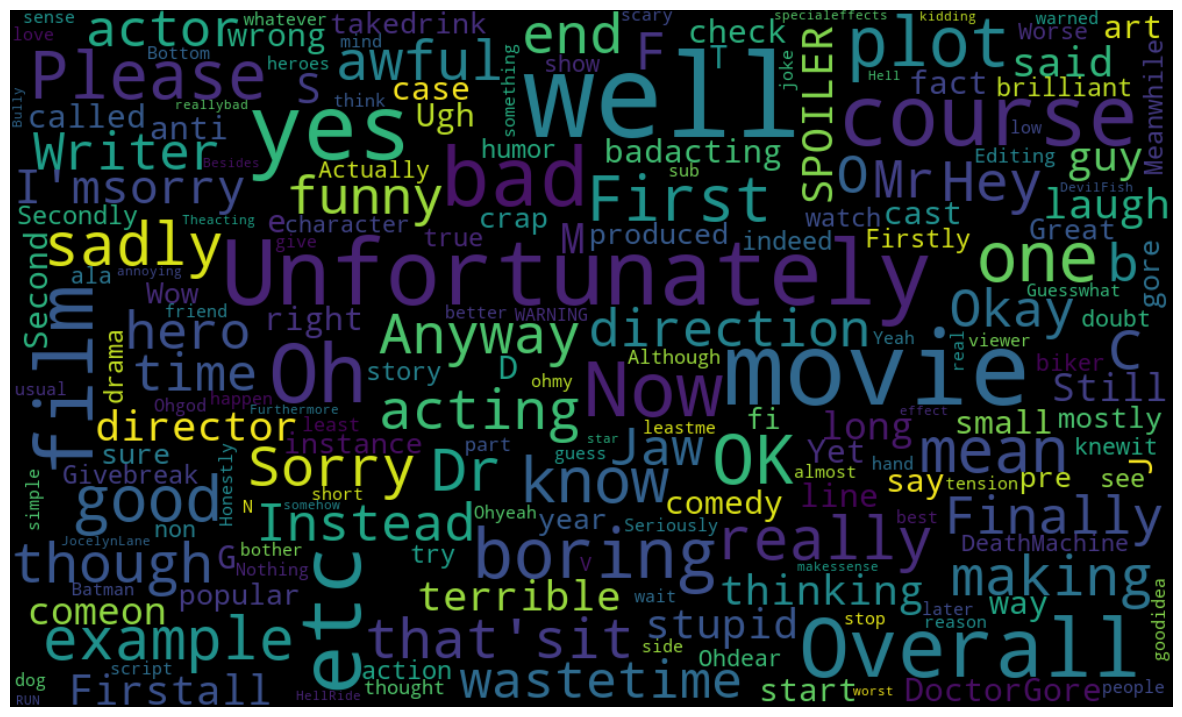

In [28]:
reviews=''.join(word for word in data['text'][data['sentiment']=='neg'].astype(str))
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()


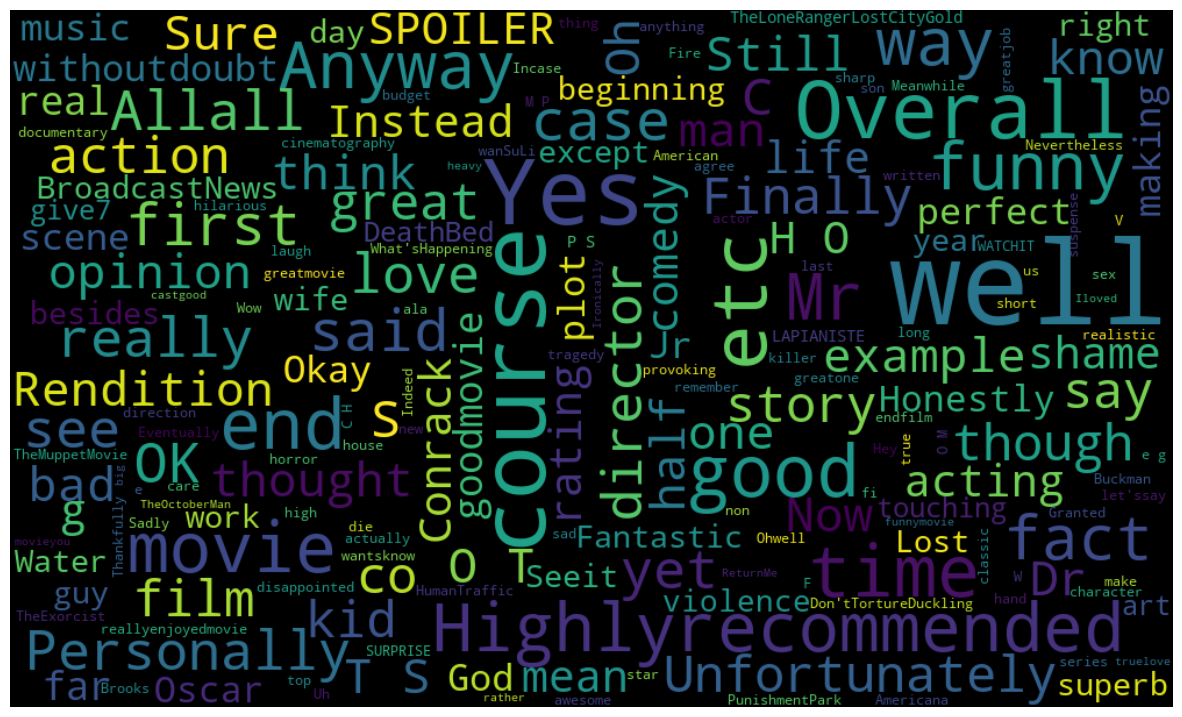

In [29]:
reviews=''.join(word for word in data['text'][data['sentiment']=='pos'].astype(str))
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [31]:

reviews=cv.fit_transform(data['text']).toarray()

In [33]:
data['sentiment']=data['sentiment'].replace(['pos','neg'],[1,0])

In [34]:
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model=LogisticRegression()

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
reviews_train,reviews_test,sent_train,sent_test=train_test_split(reviews,data['sentiment'],test_size=0.2)

In [42]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [44]:
predict=model.predict(reviews_test)

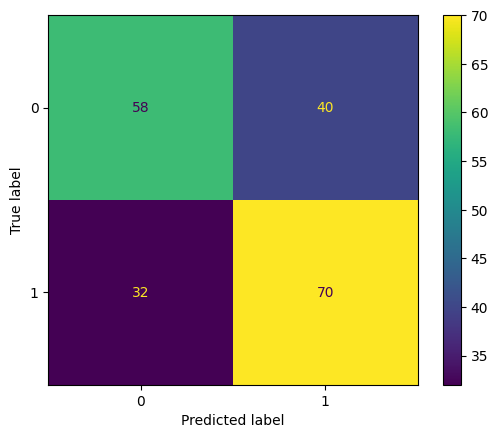

In [50]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(sent_test,predict,labels=model.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [51]:
import pickle as pk


In [54]:
pk.dump(model,open('model.pkl','wb'))

In [56]:
pk.dump(cv,open('model.pkl','wb'))